In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import scipy.stats as stats

In [19]:
def W(t):
  return np.random.normal(0,np.power(t,0.5))

In [20]:
def d(sign,t,x,r,K,sigma):
  a=1/(sigma*np.power(t,0.5))
  b=np.log(x/K)+r
  c=(sigma**2)*t/2
  return a*(b+sign*c)

In [21]:
def N(x):
  return stats.norm.cdf(x)

In [22]:
def C(t,s,T,r,K,sigma):
  a=s*N(d(+1,T-t,s,r,K,sigma))
  b=K*np.power(np.e,-r*(T-t))*N(d(-1,T-t,s,r,K,sigma))
  return a-b

In [23]:
def P(t,s,T,r,K,sigma):
  a=s-np.power(np.e,-r*(T-t))*K
  return C(t,s,T,r,K,sigma)-a

In [24]:
C=np.vectorize(C)
P=np.vectorize(P)

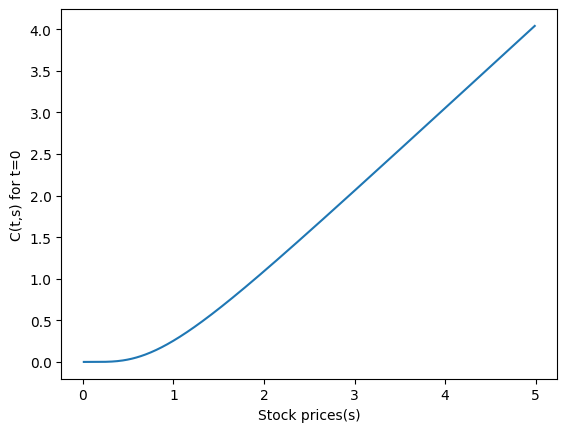

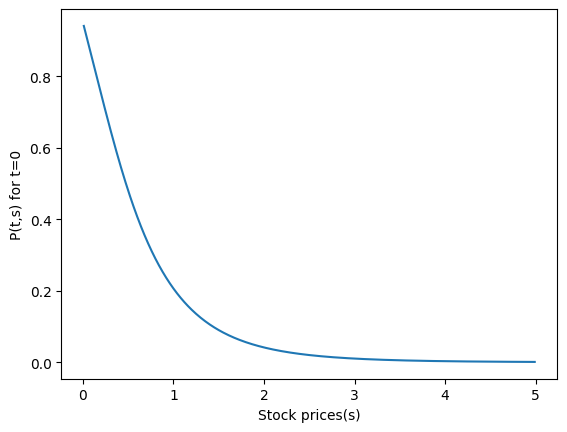

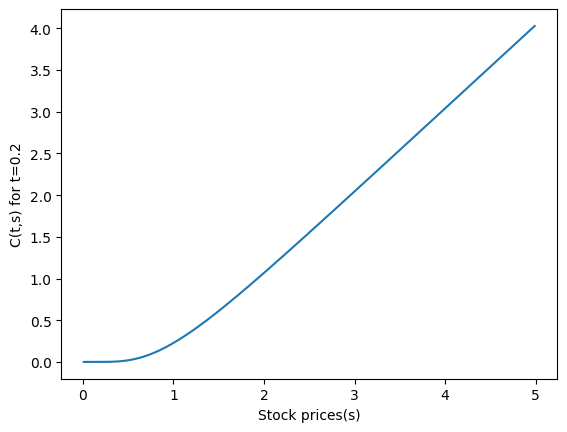

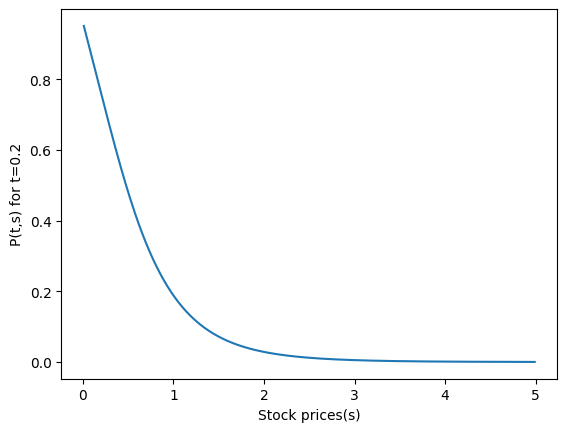

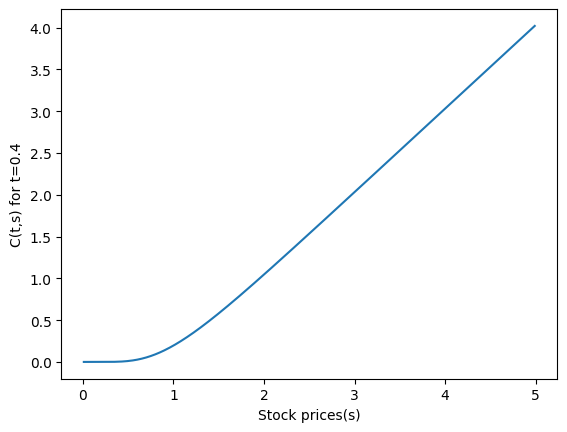

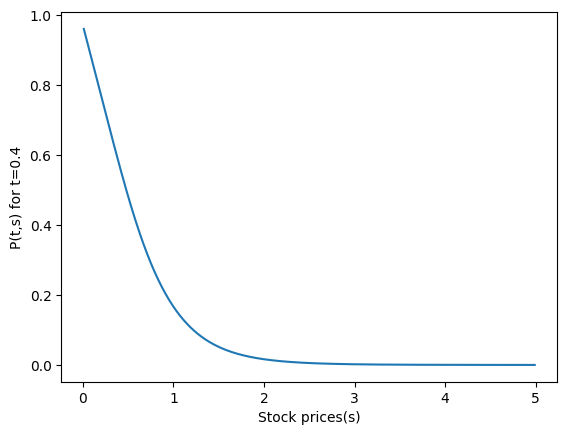

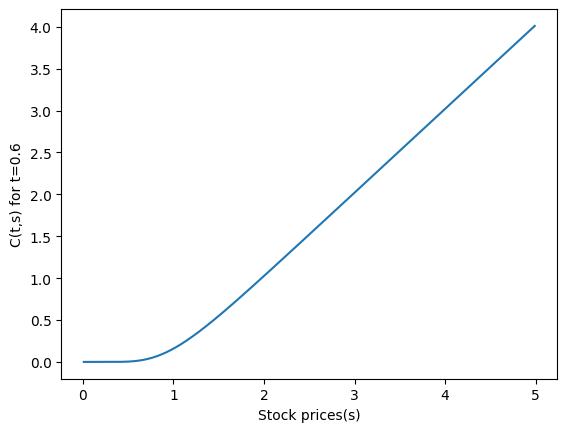

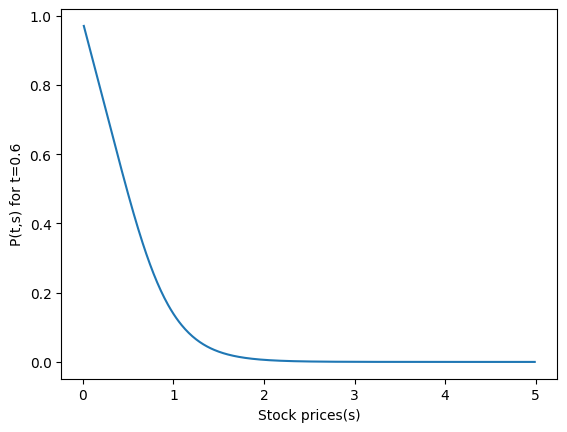

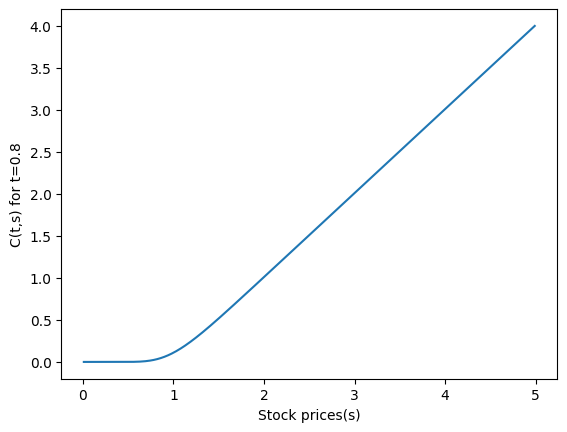

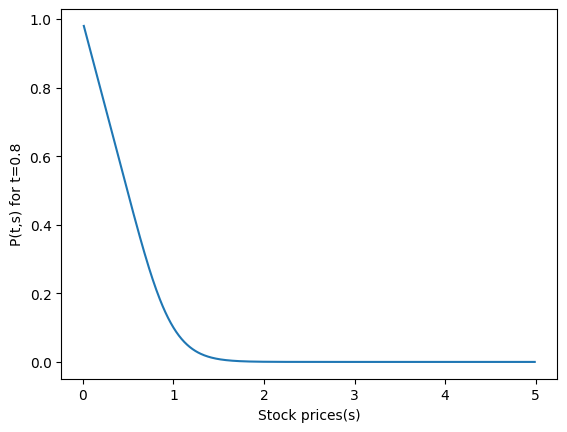

<ipython-input-20-fa4999407789>:2: RuntimeWarning: divide by zero encountered in scalar divide
  a=1/(sigma*np.power(t,0.5))


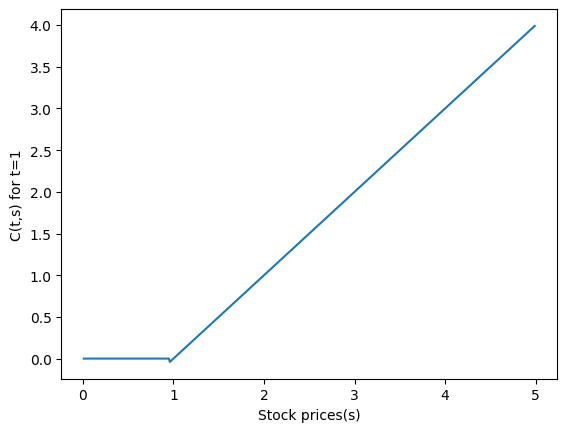

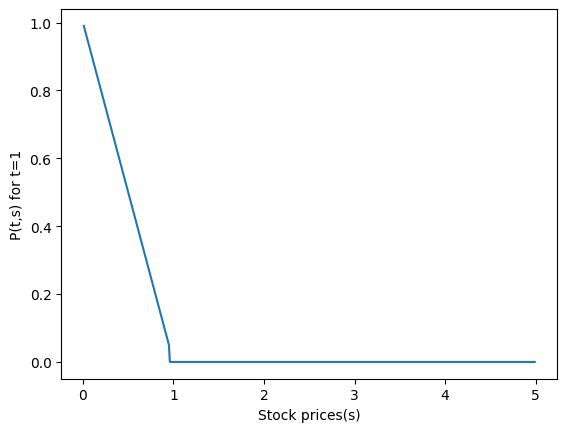

In [26]:
T=1
K=1
r=0.05
sigma=0.6
time=[0,0.2,0.4,0.6,0.8,1]
for t in time:
  x=np.arange(0.01,5,0.01)
  y=C(t,x,T,r,K,sigma)
  plt.xlabel('Stock prices(s)')
  plt.ylabel(f'C(t,s) for t={t}')
  plt.plot(x,y)
  plt.show()


  y=P(t,x,T,r,K,sigma)
  plt.xlabel('Stock prices(s)')
  plt.ylabel(f'P(t,s) for t={t}')
  plt.plot(x,y)
  plt.show()


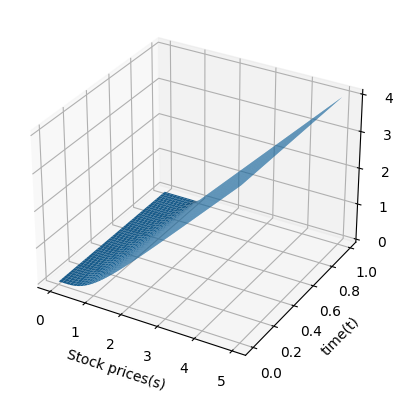

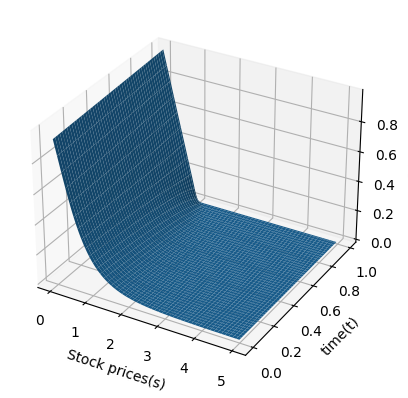

In [31]:
s=np.arange(0.01,5,0.01)
t=np.arange(0,1,0.01)
s,t=np.meshgrid(s,t)

z=C(t,s,T,r,K,sigma)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('Stock prices(s)')
ax.set_ylabel('time(t)')
ax.set_zlabel('C(t,s)')
ax.plot_surface(s,t,z)
plt.show()

z=P(t,s,T,r,K,sigma)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('Stock prices(s)')
ax.set_ylabel('time(t)')
ax.set_zlabel('P(t,s)')
ax.plot_surface(s,t,z)
plt.show()

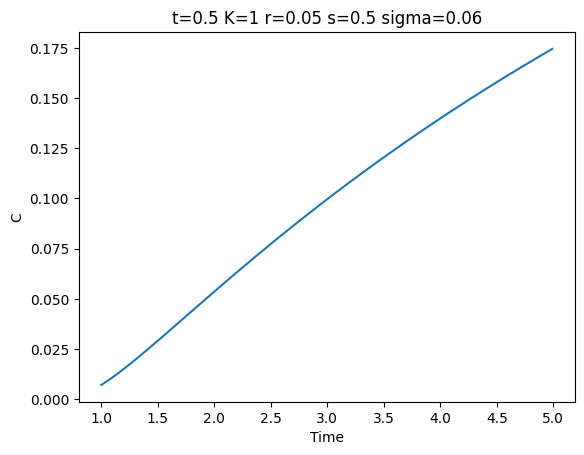

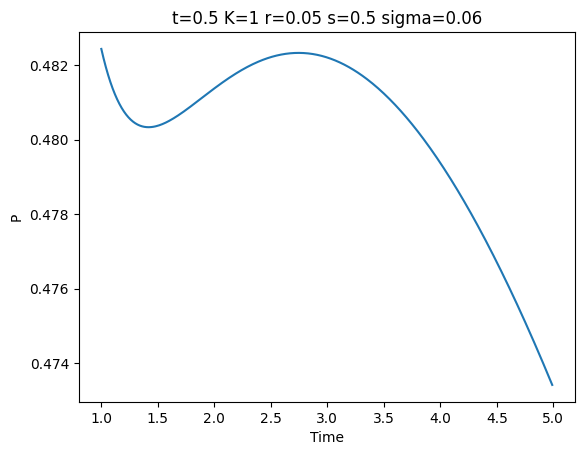

In [36]:
#T
Time=np.arange(1,5,0.01)
plt.xlabel('Time')
plt.ylabel('C')
plt.title('t=0.5 K=1 r=0.05 s=0.5 sigma=0.06')
plt.plot(Time,C(0.5,0.5,Time,r,K,sigma))
plt.show()

plt.xlabel('Time')
plt.ylabel('P')
plt.title('t=0.5 K=1 r=0.05 s=0.5 sigma=0.06')
plt.plot(Time,P(0.5,0.5,Time,r,K,sigma))
plt.show()

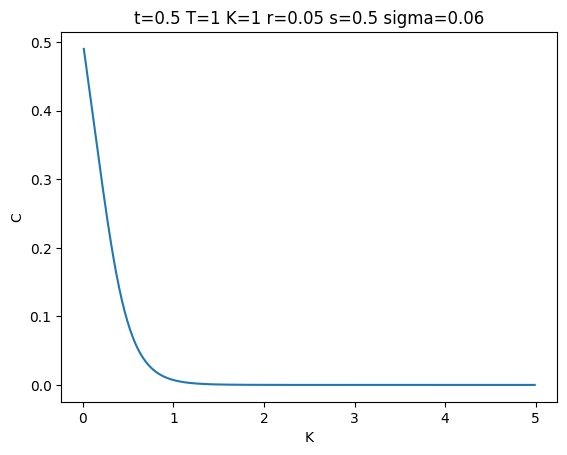

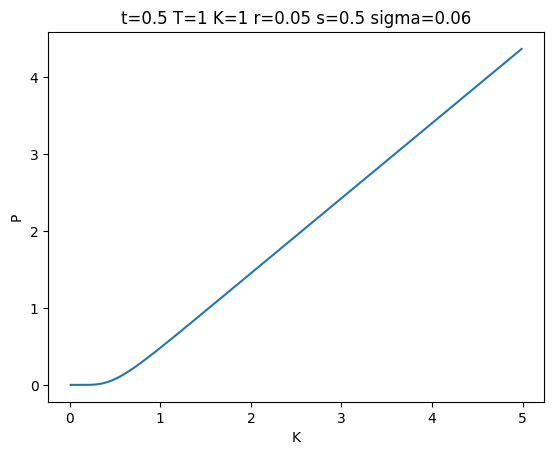

In [39]:
#K
Ka=np.arange(0.01,5,0.01)
plt.xlabel('K')
plt.ylabel('C')
plt.title('t=0.5 T=1 r=0.05 s=0.5 sigma=0.06')
plt.plot(Ka,C(0.5,0.5,T,r,Ka,sigma))
plt.show()

plt.xlabel('K')
plt.ylabel('P')
plt.title('t=0.5 T=1 r=0.05 s=0.5 sigma=0.06')
plt.plot(Ka,P(0.5,0.5,T,r,Ka,sigma))
plt.show()

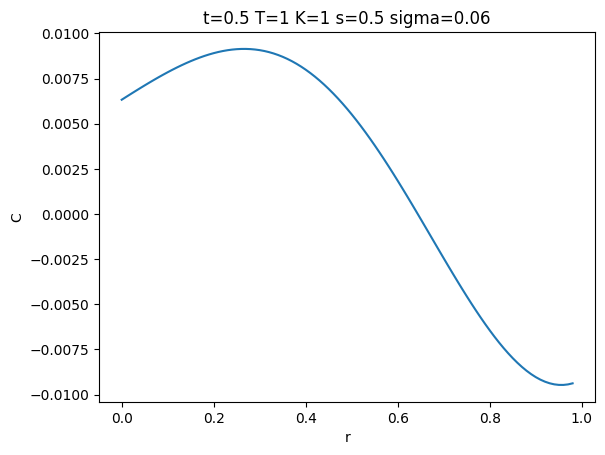

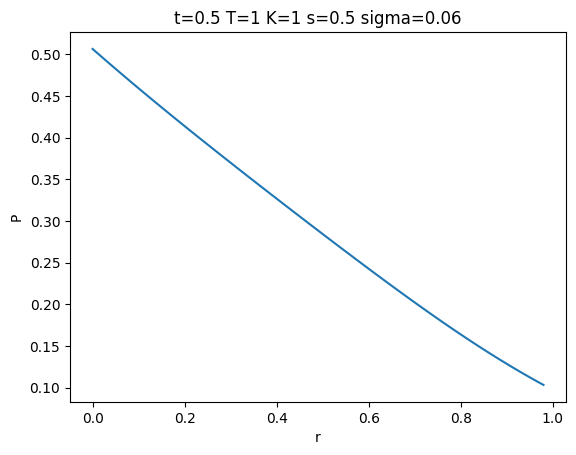

In [40]:
#r
ra=np.arange(0,0.99,0.01)
plt.xlabel('r')
plt.ylabel('C')
plt.title('t=0.5 T=1 K=1 s=0.5 sigma=0.06')
plt.plot(ra,C(0.5,0.5,T,ra,K,sigma))
plt.show()

ra=np.arange(0,0.99,0.01)
plt.xlabel('r')
plt.ylabel('P')
plt.title('t=0.5 T=1 K=1 s=0.5 sigma=0.06')
plt.plot(ra,P(0.5,0.5,T,ra,K,sigma))
plt.show()

<ipython-input-20-fa4999407789>:2: RuntimeWarning: divide by zero encountered in scalar divide
  a=1/(sigma*np.power(t,0.5))


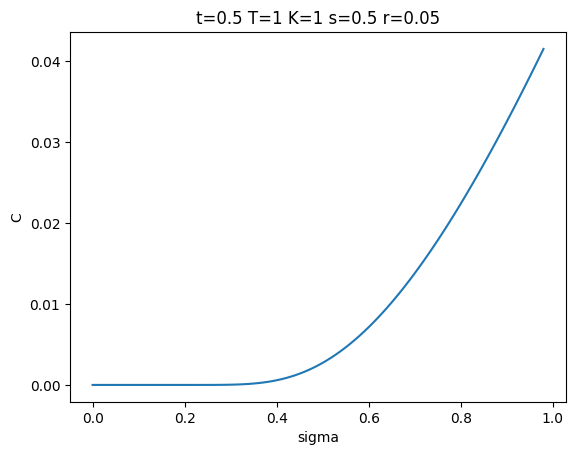

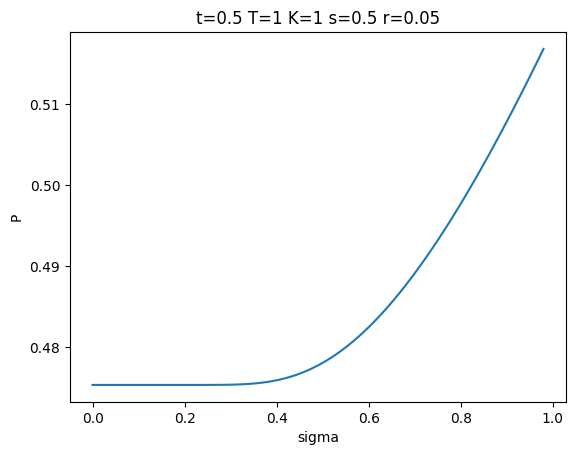

In [42]:
#sigma
sigmaa=np.arange(0,0.99,0.01)
plt.xlabel('sigma')
plt.ylabel('C')
plt.title('t=0.5 T=1 K=1 s=0.5 r=0.05')
plt.plot(sigmaa,C(0.5,0.5,T,r,K,sigmaa))
plt.show()

sigmaa=np.arange(0,0.99,0.01)
plt.xlabel('sigma')
plt.ylabel('P')
plt.title('t=0.5 T=1 K=1 s=0.5 r=0.05')
plt.plot(sigmaa,P(0.5,0.5,T,r,K,sigmaa))
plt.show()

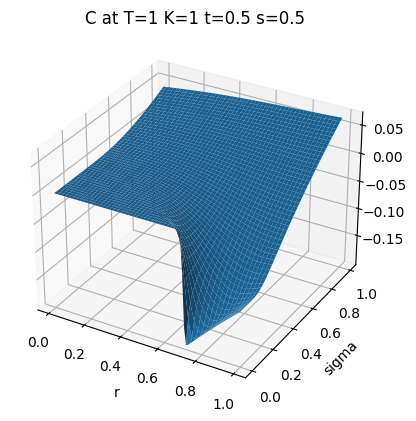

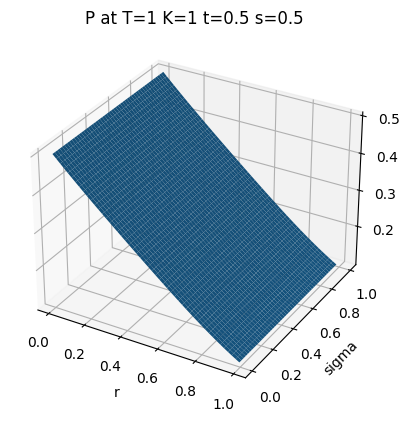

In [56]:
ra=np.arange(0.01,1,0.01)
sigmaa=np.arange(0.01,1,0.01)
ra,sigmaa=np.meshgrid(ra,sigmaa)
T=1
K=1
t=0.5
s=0.5

z=C(t,s,T,ra,K,sigmaa)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('r')
ax.set_ylabel('sigma')
ax.set_title('C at T=1 K=1 t=0.5 s=0.5')
ax.plot_surface(ra,sigmaa,z)
plt.show()

z=P(t,s,T,ra,K,sigma)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('r')
ax.set_ylabel('sigma')
ax.set_title('P at T=1 K=1 t=0.5 s=0.5')
ax.plot_surface(ra,sigmaa,z)
plt.show()

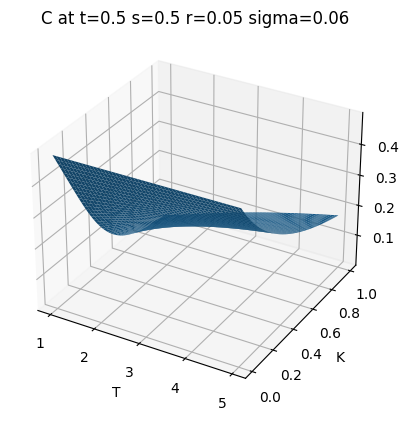

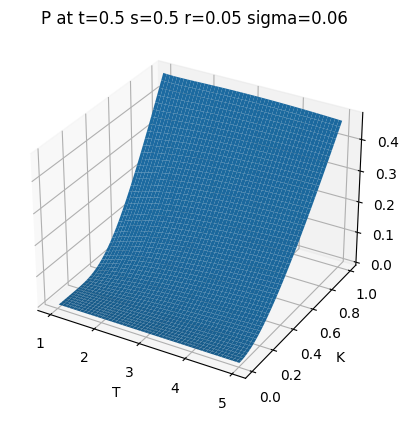

In [57]:
Ta=np.arange(1,5,0.01)
Ka=np.arange(0.01,1,0.01)
Ta,Ka=np.meshgrid(Ta,Ka)
t=0.5
s=0.5
r=0.05
sigma=0.6

z=C(t,s,Ta,r,Ka,sigma)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('T')
ax.set_ylabel('K')
ax.set_title('C at t=0.5 s=0.5 r=0.05 sigma=0.06')
ax.plot_surface(Ta,Ka,z)
plt.show()

z=P(t,s,Ta,r,Ka,sigma)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('T')
ax.set_ylabel('K')
ax.set_title('P at t=0.5 s=0.5 r=0.05 sigma=0.06')
ax.plot_surface(Ta,Ka,z)
plt.show()